In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [2]:
df_5K_1 = pd.read_csv('./files/data_1.csv')
df_5K_2 = pd.read_csv('./files/data_2.csv')
df_10K_1 = pd.read_csv('./files/data_3.csv')
df_10K_2 = pd.read_csv('./files/data_4.csv')
df_15K_1 = pd.read_csv('./files/data_5.csv')
df_15K_2 = pd.read_csv('./files/data_6.csv')

# 3. Display Reviews

In [3]:
def print_sentiment_score(dataset, print_count, col_name_to_sort):
    max_ind = len(dataset) - 1
    sorted_dataset = dataset.sort_values(col_name_to_sort)
    print('#####')
    print("These are the top "+ str(print_count) +" most postive reviews")
    print("\n")
    for i in range(print_count):
        print('This is the sentiment score: ' + str(sorted_dataset.iloc[max_ind-i][col_name_to_sort]))
        print(sorted_dataset.iloc[max_ind-i]['text'])
        print("#")

    print('#####')
    print("These are the top "+ str(print_count) +" most negative reviews")
    print("\n")
    for i in range(print_count):
        print('This is the sentiment score: ' + str(sorted_dataset.iloc[i][col_name_to_sort]))
        print(sorted_dataset.iloc[i]['text'])
        print("#")

In [4]:
## VADER
col_name = 'vader_tok'
print_sentiment_score(df_5K_1, 3, col_name)

#####
These are the top 3 most postive reviews


This is the sentiment score: 0.9806
Everything about this trip was perfect hands down , on our hotel of course ceasars palace , we stayed on the augustus tower  I love how they have there own check in totally worth it no line perfect service they really treat you like royalty , I'm really speaking the truth I had a bellagio fountain view it's breathtaking and perfect , did I mention VIP parking too  I'm hoping to try the Octavius tower next trip, but all I have to say it's I had the best experience ever :)
#
This is the sentiment score: 0.9738
I say my favorite place to go for nachos there's never a line but they're always busy they took the time to make sure you're happy my wife and kids love it we will go there at least once a week they treat us like family
#
This is the sentiment score: 0.9719
The best... the Caesar's is wonderful... wonderful rooms and spacious comfortable pool views perfect amenities .... gorgeous casino's fantastic

In [5]:
## TextBlob
col_name = 'textblob_tok'
print_sentiment_score(df_5K_1, 3, col_name)

#####
These are the top 3 most postive reviews


This is the sentiment score: 1.0
The best BBQ I've had - and I lived in Texas for a bit.  Tender and delicious meat and the best potato salad.  Just delicious!
#
This is the sentiment score: 1.0
Off menu vegan option of 8 grain patty over ratatouille was best vegan dish I have ever had. Forgot to take a picture but it was excellent
#
This is the sentiment score: 0.9333333333333332
It's a great place to go and study, or go, relax and have a cup of coffee. The coffee was excellent. I would recommend this place to someone for excellent coffee and excellent service.
#
#####
These are the top 3 most negative reviews


This is the sentiment score: -0.6111111111111109
I have never been so disrespected by a business more less a hotel in my life. Horrible customer service. I'm disgusted
#
This is the sentiment score: -0.6049999999999999
Been coming here for craps for a while- this morning, Dec. 17th, 2016 around 10am, the craps crew ARE RUDE to c

# 4. Visualize 
First, we must normalize the [-1,1] score to a [1,5] scale.

The two visualizations are:
    
    1) Frequency of Yelp Stars and Review Sentiments
    2) Correlation Heatmap of between Yelp star ratings and VADER and TextBlob sentiment scores

We wanted to find the correlation between review text sentiment value and number of starts given by the reviewer.  Our hypothesis is that with a greater sample, the correlation would be higher. Since all reviewers give stars independently, the meaning and value of each start rating may hold different weight to different reviewers. With three different sample sizes, we also explored the question of: if larger sample sizes, indeed, would provide more distinct aggregate review text sentiment value associated with each star rating.

In [6]:
def normalize_sentiments(sentiment_df):
    sentiment_df['vader_tok'] = preprocessing.minmax_scale(sentiment_df['vader_tok'], feature_range=(1, 5))
    sentiment_df['textblob_tok'] = preprocessing.minmax_scale(sentiment_df['textblob_tok'], feature_range=(1, 5))

In [7]:
normalize_sentiments(df_5K_1)
normalize_sentiments(df_5K_2)
normalize_sentiments(df_10K_1)
normalize_sentiments(df_10K_2)
normalize_sentiments(df_15K_1)
normalize_sentiments(df_15K_2)

In [8]:
def display_freq_dist(df_reviews, title1, title2):  
    df_grouped = df_reviews.groupby('stars')
    df_grouped_count= df_grouped.count()
    df_grouped_count.rename(columns={'text':'Sentiment count'},inplace=True)
    print(df_grouped_count.plot(kind='bar', color='red', legend=False, title=title1))
    
    f, ((ax_box1, ax_box2), (ax_hist1, ax_hist2)) = plt.subplots(2, 2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    ax_box1.set_title(title2)
    sns.boxplot(df_reviews["vader_tok"], ax=ax_box1)
    sns.distplot(df_reviews["vader_tok"], ax=ax_hist1)
    
    sns.boxplot(df_reviews["textblob_tok"], ax=ax_box2)
    sns.distplot(df_reviews["textblob_tok"], ax=ax_hist2)

AxesSubplot(0.125,0.125;0.775x0.755)


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


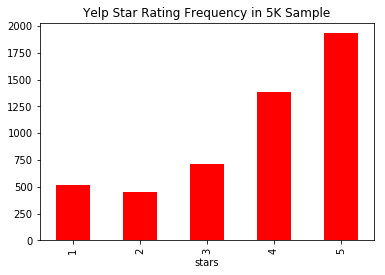

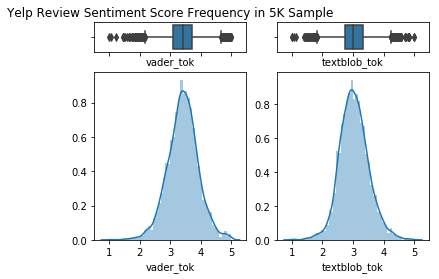

In [9]:
display_freq_dist(df_5K_1, 'Yelp Star Rating Frequency in 5K Sample', 'Yelp Review Sentiment Score Frequency in 5K Sample')

AxesSubplot(0.125,0.125;0.775x0.755)


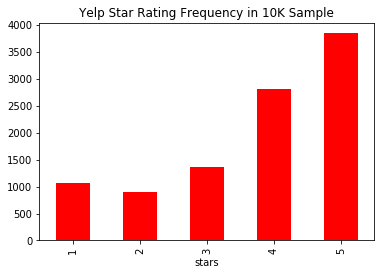

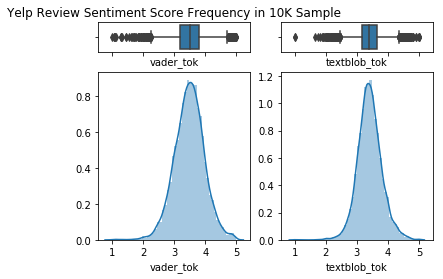

In [10]:
display_freq_dist(df_10K_1, 'Yelp Star Rating Frequency in 10K Sample', 'Yelp Review Sentiment Score Frequency in 10K Sample')

AxesSubplot(0.125,0.125;0.775x0.755)


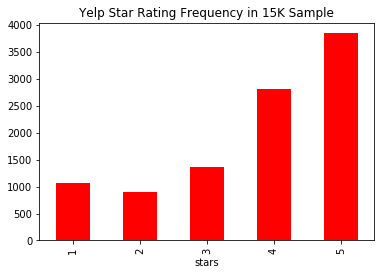

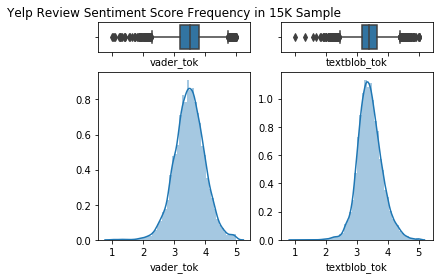

In [11]:
display_freq_dist(df_15K_1, 'Yelp Star Rating Frequency in 15K Sample', 'Yelp Review Sentiment Score Frequency in 15K Sample')

# 4. Find Correlation

In [12]:
def find_corr_display_tables(df_reviews):
    df_reviews_trim = df_reviews.drop(columns=['Unnamed: 0'])
    df_corr = df_reviews_trim.corr();
    ax = plt.axes()
    sns.heatmap(df_corr, ax = ax)
    ax.set_title('Correlation')
    
    df_grouped = df_reviews_trim.groupby('stars')
    df_grouped_mean =  df_grouped.mean()
    print('Then mean sentiment score associated with each star rating:')
    print(df_grouped_mean)
    
    df_grouped_median =  df_grouped.median()
    print('Then median sentiment score associated with each star rating:')
    print(df_grouped_median)
    
    print('The correlation between star rating and VADER generated sentiment score is: ' + str(df_corr['stars']['vader_tok']))
    print('The correlation between star rating and TextBlob generated sentiment score is: ' + str(df_corr['stars']['textblob_tok']))

Then mean sentiment score associated with each star rating:
       vader_tok  textblob_tok
stars                         
1       2.734449      2.439940
2       2.986998      2.676769
3       3.239677      2.886851
4       3.519530      3.119141
5       3.672884      3.283178
Then median sentiment score associated with each star rating:
       vader_tok  textblob_tok
stars                         
1       2.763940      2.492992
2       3.000475      2.666263
3       3.240756      2.873244
4       3.493915      3.079440
5       3.644038      3.245435
The correlation between star rating and VADER generated sentiment score is: 0.6166928460998994
The correlation between star rating and TextBlob generated sentiment score is: 0.5829458759328541


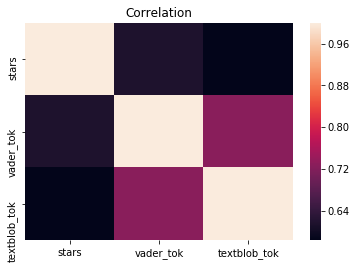

In [13]:
find_corr_display_tables(df_5K_1)

Then mean sentiment score associated with each star rating:
       vader_tok  textblob_tok
stars                         
1       2.831662      2.567871
2       3.072699      2.800196
3       3.310314      3.008034
4       3.607266      3.230127
5       3.715203      3.369173
Then median sentiment score associated with each star rating:
       vader_tok  textblob_tok
stars                         
1       2.871419      2.606443
2       3.084186      2.803293
3       3.299333      2.984749
4       3.581562      3.194003
5       3.687513      3.329010
The correlation between star rating and VADER generated sentiment score is: 0.6028862721118378
The correlation between star rating and TextBlob generated sentiment score is: 0.5795613737876678


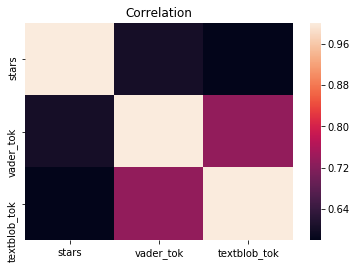

In [14]:
find_corr_display_tables(df_5K_2)

Then mean sentiment score associated with each star rating:
       vader_tok  textblob_tok
stars                         
1       2.832142      2.919309
2       3.073809      3.113979
3       3.335634      3.311776
4       3.602052      3.480784
5       3.740723      3.614294
Then median sentiment score associated with each star rating:
       vader_tok  textblob_tok
stars                         
1       2.861232      2.959630
2       3.074928      3.112644
3       3.302074      3.290912
4       3.566668      3.450000
5       3.713855      3.575218
The correlation between star rating and VADER generated sentiment score is: 0.6273965490956794
The correlation between star rating and TextBlob generated sentiment score is: 0.5860509285571371


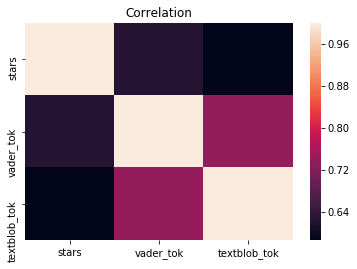

In [15]:
find_corr_display_tables(df_10K_1)

Then mean sentiment score associated with each star rating:
       vader_tok  textblob_tok
stars                         
1       2.840707      2.931644
2       3.083629      3.125824
3       3.310215      3.297200
4       3.583227      3.488644
5       3.733165      3.623716
Then median sentiment score associated with each star rating:
       vader_tok  textblob_tok
stars                         
1       2.856680      2.973062
2       3.081471      3.121221
3       3.281922      3.289815
4       3.551004      3.455839
5       3.712948      3.598512
The correlation between star rating and VADER generated sentiment score is: 0.6154694689099754
The correlation between star rating and TextBlob generated sentiment score is: 0.5858743621470772


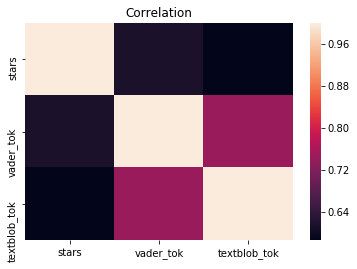

In [16]:
find_corr_display_tables(df_10K_2)

Then mean sentiment score associated with each star rating:
       vader_tok  textblob_tok
stars                         
1       3.477445      3.406174
2       3.468970      3.401626
3       3.483081      3.409069
4       3.503865      3.427520
5       3.503291      3.428083
Then median sentiment score associated with each star rating:
       vader_tok  textblob_tok
stars                         
1       3.472850      3.377778
2       3.476400      3.378902
3       3.480791      3.382667
4       3.504142      3.406632
5       3.505654      3.403851
The correlation between star rating and VADER generated sentiment score is: 0.023369928538442476
The correlation between star rating and TextBlob generated sentiment score is: 0.02386015005899249


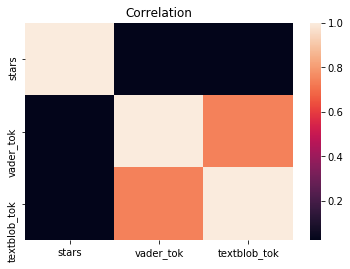

In [17]:
find_corr_display_tables(df_15K_1)

Then mean sentiment score associated with each star rating:
       vader_tok  textblob_tok
stars                         
1       3.477445      3.406174
2       3.468970      3.401626
3       3.483081      3.409069
4       3.503865      3.427520
5       3.503291      3.428083
Then median sentiment score associated with each star rating:
       vader_tok  textblob_tok
stars                         
1       3.472850      3.377778
2       3.476400      3.378902
3       3.480791      3.382667
4       3.504142      3.406632
5       3.505654      3.403851
The correlation between star rating and VADER generated sentiment score is: 0.023369928538442476
The correlation between star rating and TextBlob generated sentiment score is: 0.02386015005899249


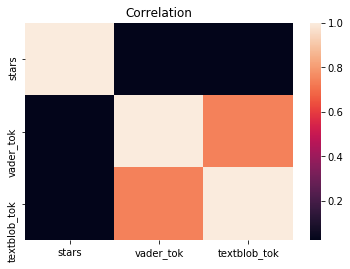

In [18]:
find_corr_display_tables(df_15K_2)